In [27]:
# encoding=utf8
import sys
reload(sys)
sys.setdefaultencoding('utf8')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
df = pd.read_csv('../Data/todays_top_hits_06032017.csv', sep=',', encoding='utf8')

In [29]:
df

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.
0,1,Shape of You,Ed Sheeran,2017-03-03,96,65,83,-3,93,3:54,58,72
1,2,It Ain’t Me (with Selena Gomez),Kygo,2017-02-16,100,53,65,-7,50,3:41,9,82
2,3,Something Just Like This,The Chainsmokers,2017-02-22,103,65,61,-7,47,4:08,3,89
3,4,Cold,Maroon 5,2017-02-14,100,71,70,-6,48,3:54,12,79
4,5,That's What I Like,Bruno Mars,2016-11-17,134,56,85,-5,85,3:27,1,88
5,6,Issues,Julia Michaels,2017-01-13,114,42,70,-7,45,2:56,42,84
6,7,Scared to Be Lonely,Martin Garrix,2017-01-27,138,54,58,-8,19,3:41,9,92
7,8,Stay (with Alessia Cara),Zedd,2017-02-23,101,63,46,-5,54,3:30,24,77
8,9,Believer,Imagine Dragons,2017-01-31,125,78,77,-4,74,3:24,4,81
9,10,Paris,The Chainsmokers,2017-01-13,100,64,65,-7,26,3:42,2,95


In [30]:
#get the last 4 characters from Date xx/xx/xxxx or xxxx for consistency
df['YEAR'] = df['RELEASE'].str[:4]

In [31]:
df['YEAR'] = df['YEAR'].convert_objects(convert_numeric=True)

In [32]:
df = df.drop('RELEASE', 1)

In [33]:
df

,#,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,YEAR
0,1,Shape of You,Ed Sheeran,96,65,83,-3,93,3:54,58,72,2017
1,2,It Ain’t Me (with Selena Gomez),Kygo,100,53,65,-7,50,3:41,9,82,2017
2,3,Something Just Like This,The Chainsmokers,103,65,61,-7,47,4:08,3,89,2017
3,4,Cold,Maroon 5,100,71,70,-6,48,3:54,12,79,2017
4,5,That's What I Like,Bruno Mars,134,56,85,-5,85,3:27,1,88,2016
5,6,Issues,Julia Michaels,114,42,70,-7,45,2:56,42,84,2017
6,7,Scared to Be Lonely,Martin Garrix,138,54,58,-8,19,3:41,9,92,2017
7,8,Stay (with Alessia Cara),Zedd,101,63,46,-5,54,3:30,24,77,2017
8,9,Believer,Imagine Dragons,125,78,77,-4,74,3:24,4,81,2017
9,10,Paris,The Chainsmokers,100,64,65,-7,26,3:42,2,95,2017


In [34]:
#hack because pandas thinks that our minutes are hours
time = pd.DatetimeIndex(df['LENGTH'])
seconds = time.hour * 60 + time.minute

In [35]:
(df['Seconds']) = seconds

In [36]:
df = df.drop('LENGTH', 1)

In [37]:
df

,#,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,1,Shape of You,Ed Sheeran,96,65,83,-3,93,58,72,2017,234
1,2,It Ain’t Me (with Selena Gomez),Kygo,100,53,65,-7,50,9,82,2017,221
2,3,Something Just Like This,The Chainsmokers,103,65,61,-7,47,3,89,2017,248
3,4,Cold,Maroon 5,100,71,70,-6,48,12,79,2017,234
4,5,That's What I Like,Bruno Mars,134,56,85,-5,85,1,88,2016,207
5,6,Issues,Julia Michaels,114,42,70,-7,45,42,84,2017,176
6,7,Scared to Be Lonely,Martin Garrix,138,54,58,-8,19,9,92,2017,221
7,8,Stay (with Alessia Cara),Zedd,101,63,46,-5,54,24,77,2017,210
8,9,Believer,Imagine Dragons,125,78,77,-4,74,4,81,2017,204
9,10,Paris,The Chainsmokers,100,64,65,-7,26,2,95,2017,222


In [38]:
df2 = pd.read_pickle('spotify_dataframe.pkl')

In [39]:
df2

,#,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,YEAR,Seconds
0,1,Nightcall,Lips,127,47,92,-8,74,4,25,2013,227
1,2,Écho,Lili Poe,170,67,50,-7,13,6,36,2016,221
2,3,Lead Us Home,Hydrogen Sea,100,63,75,-8,67,12,15,2016,184
3,4,Meins sollte Meins sein,Barbara Morgenstern,120,29,59,-15,8,94,5,2015,341
4,5,Familiar,Agnes Obel,137,41,55,-12,23,92,52,2016,236
5,6,The Hunter,Marnie,118,84,56,-7,49,6,31,2013,253
6,7,Easier Said Than Done,Morcheeba,115,36,71,-13,33,25,26,2010,221
7,8,Helicopter,Oh Land,90,47,62,-9,48,36,18,2011,210
8,9,In Your Dreams,Dark Dark Dark,154,54,54,-11,51,80,40,2011,200
9,10,Jmy attendais pas,Clea Vincent,120,69,77,-8,62,31,30,2016,245


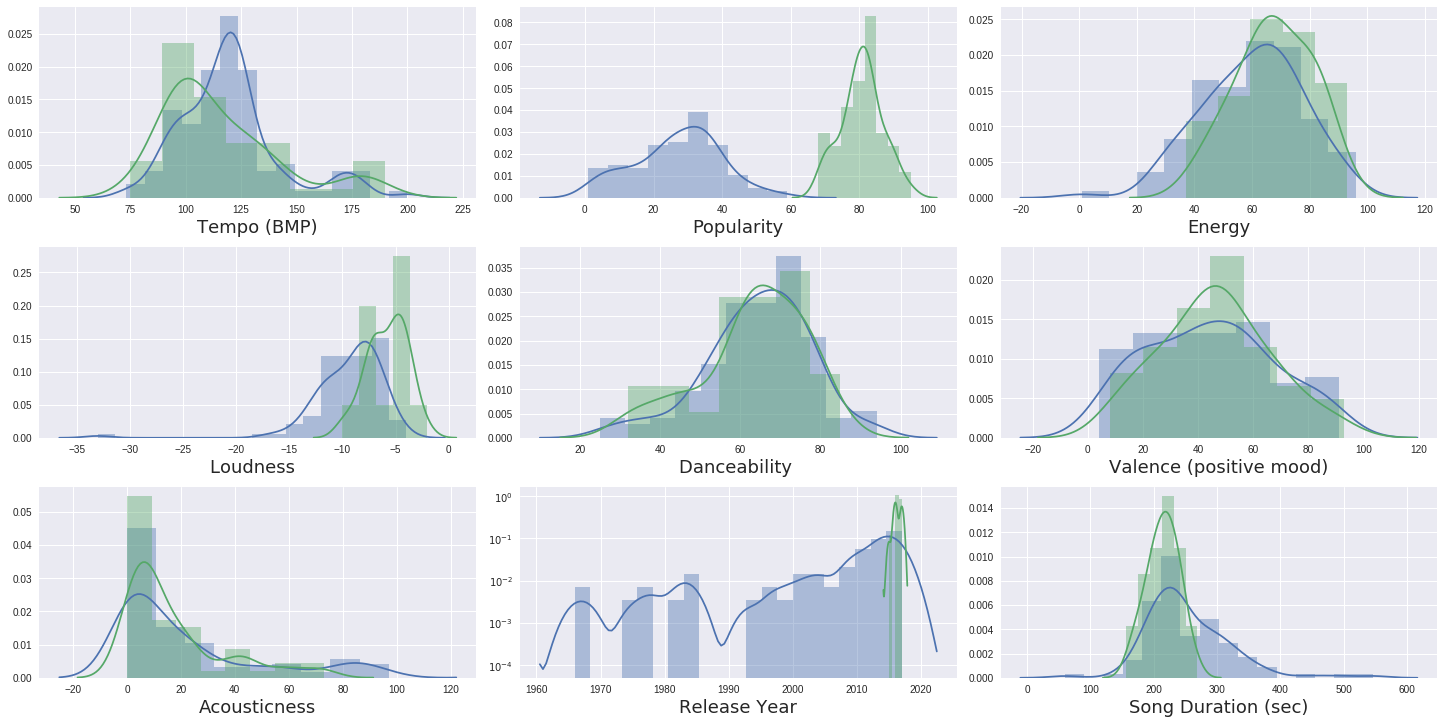

In [40]:
plt.figure(1, figsize=(20, 10),)

hfont = {'fontname':'Proxima Nova'}

plt.subplot(331)
sns.distplot(df2.BPM);
sns.distplot(df.BPM);
#plt.text(10, .010, r'$\mu=\ 121.12$', fontsize=22)
plt.xlabel('Tempo (BMP)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(332)
sns.distplot(df2['POP.']);
sns.distplot(df['POP.']);
#plt.text(70, .020, r'$\mu=\ 30.51$', fontsize=22)
plt.xlabel('Popularity', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(333)
sns.distplot(df2.ENERGY);
sns.distplot(df.ENERGY);
#plt.text(85, .010, r'$\mu=\ 52.05$', fontsize=22)
plt.xlabel('Energy', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(334)
sns.distplot(df2.LOUD);
sns.distplot(df.LOUD);
#plt.text(-30, 0.10, r'$\mu=\ -9.36$', fontsize=22)
plt.xlabel('Loudness  ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(335)
sns.distplot(df2.DANCE);
sns.distplot(df.DANCE);
#plt.text(70, 0.02, r'$\mu=\ 47.38$', fontsize=22)
plt.xlabel('Danceability ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(336)
sns.distplot(df2.VALENCE);
sns.distplot(df.VALENCE);
#plt.text(80, 0.01, r'$\mu=\ 40.68$', fontsize=22)
plt.xlabel('Valence (positive mood)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(337)
sns.distplot(df2.ACOUSTIC);
sns.distplot(df.ACOUSTIC);
#plt.text(80, 0.02, r'$\mu=\ 40.46$', fontsize=22)
plt.xlabel('Acousticness', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(338)
sns.distplot(df2.YEAR,).set(yscale="log");
sns.distplot(df.YEAR,).set( yscale="log");
plt.xlabel('Release Year', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(339)
sns.distplot(df2.Seconds);
sns.distplot(df.Seconds);

#this corresponds to YEAR above, but somehow Matplot fucked it up when changing it
#plt.text(-1100, 0.002, r'$\mu≈\ 2004$', fontsize=22)

#Seconds 
#plt.text(500, 0.002, r'$\mu=\ 262.82$', fontsize=22)
plt.xlabel('Song Duration (sec)', fontsize=18, **hfont)
plt.grid(True)

plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=1.0)